In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from fado.preprocessing import MetricOptimizer

## 1. Load Dataset

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# encode non-numeric columns to labels
le = LabelEncoder()
iris_transform = iris.apply(le.fit_transform)

# make species binary
iris_transform['species'] = iris_transform['species'] == 0

# make label
iris_transform['petal_length'] = iris_transform['petal_length'] > 9

In [3]:
iris_transform

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,False,1,True
1,6,9,False,1,True
2,4,11,False,1,True
3,3,10,False,1,True
4,7,15,False,1,True
...,...,...,...,...,...
145,24,9,True,19,False
146,20,4,True,15,False
147,22,9,True,16,False
148,19,13,True,19,False


## 2. Initialize MetricOptimizer

In [4]:
# Double the dataset
preproc = MetricOptimizer(frac=2,
                          protected_attribute='species',
                          label='petal_length')

In [5]:
preproc = preproc.fit(iris_transform)

### Get Fair Dataset

In [6]:
iris_fair = preproc.transform()

In [7]:
iris_fair

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,False,1,True
1,6,9,False,1,True
2,4,11,False,1,True
3,3,10,False,1,True
4,7,15,False,1,True
...,...,...,...,...,...
294,28,7,True,15,False
295,17,8,False,9,False
296,22,8,True,13,True
297,12,9,True,4,False


## Compare Correlation Matrices

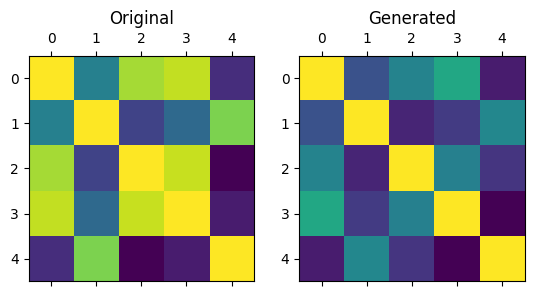

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.matshow(iris_transform.corr())
ax1.title.set_text("Original")

ax2.matshow(iris_fair.iloc[-150::].corr())
ax2.title.set_text("Generated")

In [9]:
np.linalg.norm(iris_transform.corr() - iris_fair.iloc[-150::].corr())

2.1863230331670063